<pre>
<center><b><h1>Machine Learning Project</b></center>
<center><h3>Pushti Hirpara | 23010101410 | 772</h3></center>
<center><b><h1>Cardiovascular Heart</b></center>    
<pre>    

<pre>
<center><b><h2>Week 1 Task</h2></b></center>
<pre> 

### 1. IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. LOAD DATASET

In [3]:
df = pd.read_csv("cardio_train.csv", sep=";")
df = df.copy(deep=True)     # IMPORTANT — removes SettingWithCopyWarning
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 3. BASIC DATA OBSERVATION

In [4]:
# row*col
df.shape

(70000, 13)

In [5]:
#basic info of csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#gives statistical analysis
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [10]:
a= df.columns
for i in a:
    print(i)

id
age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio


In [11]:
df.groupby('weight').max()

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
weight,,,,,,,,,,,,
10.0,82567,18804,2,165,180,1100,2,2,0,0,1,1
11.0,48318,21582,2,178,130,90,1,1,0,0,1,1
21.0,85931,21855,1,162,120,80,2,1,0,0,1,1
22.0,42156,20408,2,177,120,80,1,1,1,1,1,0
23.0,38312,23284,1,157,110,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178.0,88220,20656,2,165,140,90,3,3,1,1,1,1
180.0,87612,18975,2,196,140,100,3,2,0,0,1,1
181.0,52564,19630,1,161,180,1100,2,1,0,0,1,1


In [12]:
# Counts the occurrences of unique values in a specific column, useful for understanding categorical data distributions.
df['age'].value_counts()

age
19741    32
18236    32
20442    31
20376    31
18253    31
         ..
17241     1
16077     1
19433     1
22063     1
21451     1
Name: count, Length: 8076, dtype: int64

In [13]:
# find mean for particular column
np.mean(df['age'])

np.float64(19468.865814285713)

In [14]:
# find median for particular column
np.median(df['age'])

np.float64(19703.0)

In [15]:
# find standard deviation for particular column
np.std(df['age'])

2467.2340439522563

In [16]:
np.min(df['height'])

55

In [17]:
np.max(df['weight'])

200.0

In [18]:
heights = np.array(df['height'])
np.mean(heights)
np.median(heights)
np.std(heights)

np.float64(8.210067720568848)

In [19]:
df['gender'].unique()

array([2, 1])

In [20]:
print("normal cholesterol: ",(df['cholesterol']==1).sum())
print("normal cholesterol: ",(df['cholesterol']==2).sum())
print("normal cholesterol: ",(df['cholesterol']==3).sum())

normal cholesterol:  52385
normal cholesterol:  9549
normal cholesterol:  8066


In [21]:
print("No of Smoker & drink alcohol: ", ((df['smoke'] == 1) & (df['alco'] == 1)).sum())

print("No of Non-Smoker & dont drink ALcohol: ", ((df['smoke'] == 0) & (df['alco'] == 0)).sum())

No of Smoker & drink alcohol:  1854
No of Non-Smoker & dont drink ALcohol:  61921


<pre>
<center><b><h2>Week 2 Task</h2></b></center>
<pre>   

In [22]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df['age'] = (df['age'] // 365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
df.rename(columns={
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp'
}, inplace=True)
df

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [26]:
df = df.loc[(df['height'] >= 120) & (df['height'] <= 220)]
df = df.loc[(df['weight'] >= 40) & (df['weight'] <= 200)]

In [27]:
df

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [28]:
df = df.loc[(df['systolic_bp'] >= 80) & (df['systolic_bp'] <= 250)]
df = df.loc[(df['diastolic_bp'] >= 40) & (df['diastolic_bp'] <= 160)]
df = df.loc[df['systolic_bp'] >= df['diastolic_bp']]
df

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
# Remove true duplicates (ignore id)
cleandf = df.drop_duplicates(
    subset=df.columns.drop('id'),
    keep='first'
)

print("Original shape:", df.shape)
print("After duplicate removal:", cleandf.shape)


Original shape: (68567, 13)
After duplicate removal: (65361, 13)


In [30]:
cleandf.loc[:, 'BMI'] = cleandf['weight'] / ((cleandf['height']/100) ** 2)
cleandf

C:\Users\PUSHTI\AppData\Local\Temp\ipykernel_27396\3837192886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.loc[:, 'BMI'] = cleandf['weight'] / ((cleandf['height']/100) ** 2)


,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [31]:
cleandf.reset_index(drop=True, inplace=True)
cleandf

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65356,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
65357,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
65358,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
65359,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


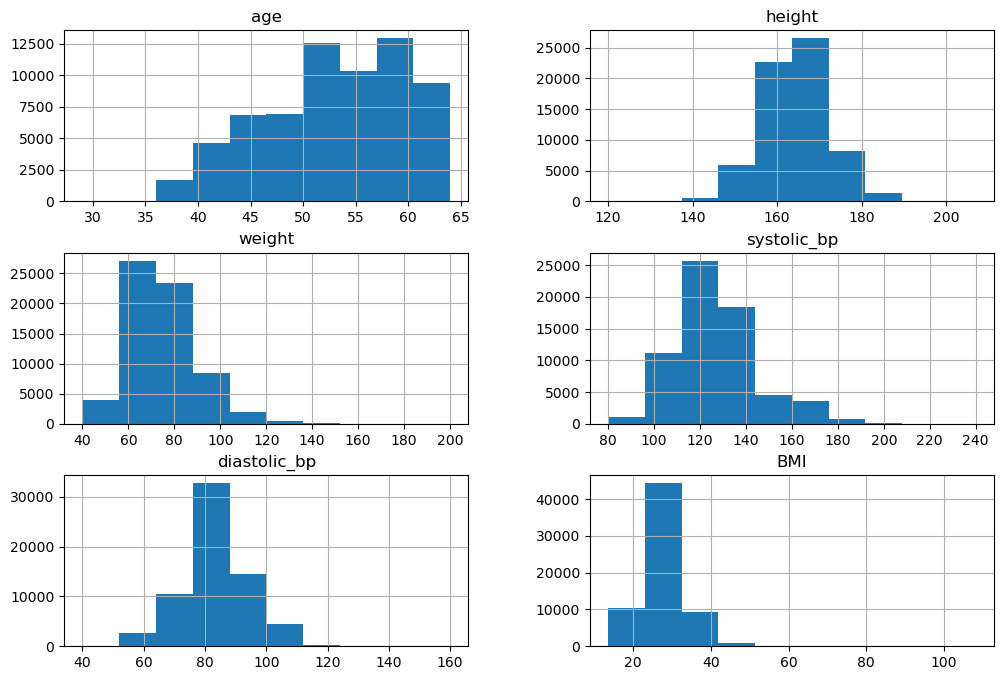

In [32]:
cleandf[['age', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'BMI']].hist(figsize=(12,8))
plt.show()


In [33]:
cleandf[['age', 'height']].corr()


,age,height
age,1.000000,-0.087604
height,-0.087604,1.000000


<pre>
<center><b><h2>Week 3 Task</h2></b></center>
<pre>   

In [34]:
cleandf.to_csv('HeartD.csv', index=False)

In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [36]:
data = pd.read_csv('HeartD.csv')
data


,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65356,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
65357,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
65358,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
65359,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


### Import sklearn and check the version.

In [37]:
import sklearn

In [38]:
X = data.drop(columns=["id", "cardio"])
y = data["cardio"]


In [39]:
X

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
65356,57,1,165,80.0,150,80,1,1,0,0,1,29.384757
65357,61,1,158,126.0,140,90,2,2,0,0,1,50.472681
65358,52,2,183,105.0,180,90,3,1,0,1,0,31.353579
65359,61,1,163,72.0,135,80,1,2,0,0,0,27.099251


In [40]:
### standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Logistic Regression 

In [41]:
#### => Train–Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred_tt = logistic.predict(X_test)
acc_tt = accuracy_score(y_test, y_pred_tt)

print("Logistic:Train-Test Split Accuracy:", acc_tt)


Logistic:Train-Test Split Accuracy: 0.7235453108266612


In [43]:
#### => K-Fold

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train_kf, X_test_kf = X_scaled[train_index], X_scaled[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    lr_kf = LogisticRegression(max_iter=1000)
    lr_kf.fit(X_train_kf, y_train_kf)

    y_pred_kf = lr_kf.predict(X_test_kf)
    acc = accuracy_score(y_test_kf, y_pred_kf)
    kf_accuracies.append(acc)


print("Logistic: Mean K-Fold Accuracy:", np.mean(kf_accuracies))


Logistic: Mean K-Fold Accuracy: 0.7246981747162928


In [45]:
#### => Hypertest Tuning Parameter

In [46]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_scaled, y)


print("Best Accuracy (Hyperparameter Tuning):", grid.best_score_)


Best Accuracy (Hyperparameter Tuning): 0.7245758353829137


## Random-Forest

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf_tt = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)


rf_tt.fit(X_train, y_train)

y_pred_tt = rf_tt.predict(X_test)
acc_tt_rf = accuracy_score(y_test, y_pred_tt)

print("Random Forest Train-Test Accuracy:", acc_tt_rf)


Random Forest Train-Test Accuracy: 0.7310418685297567


In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_accuracies_rf = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    rf_kf = RandomForestClassifier(
        n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
    )

    rf_kf.fit(X_train_kf, y_train_kf)

    y_pred_kf = rf_kf.predict(X_test_kf)
    acc = accuracy_score(y_test_kf, y_pred_kf)
    kf_accuracies_rf.append(acc)


print("Mean K-Fold Accuracy (RF):", np.mean(kf_accuracies_rf))


Mean K-Fold Accuracy (RF): 0.7303130975472352


In [52]:
param_grid_nb = {
    'var_smoothing': np.logspace(-11, -7, 5)
}

grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='accuracy'
)

grid_nb.fit(X_scaled, y)

print("Best Parameter (NB):", grid_nb.best_params_)
print("Best Accuracy (NB Hyperparameter Tuning):", grid_nb.best_score_)


Best Parameter (NB): {'var_smoothing': np.float64(1e-11)}
Best Accuracy (NB Hyperparameter Tuning): 0.704655626474104


## Navie Bayes

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

nb_tt = GaussianNB()
nb_tt.fit(X_train, y_train)

y_pred_tt = nb_tt.predict(X_test)
acc_tt_nb = accuracy_score(y_test, y_pred_tt)

print("Naive Bayes Train-Test Accuracy:", acc_tt_nb)


Naive Bayes Train-Test Accuracy: 0.7076417042759887


In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_accuracies_nb = []

for train_index, test_index in kf.split(X_scaled):
    X_train_kf, X_test_kf = X_scaled[train_index], X_scaled[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    nb_kf = GaussianNB()
    nb_kf.fit(X_train_kf, y_train_kf)

    y_pred_kf = nb_kf.predict(X_test_kf)
    acc = accuracy_score(y_test_kf, y_pred_kf)
    kf_accuracies_nb.append(acc)


print("Mean K-Fold Accuracy (NB):", np.mean(kf_accuracies_nb))


Mean K-Fold Accuracy (NB): 0.7044720373056261


In [55]:
param_grid_nb = {
    'var_smoothing': np.logspace(-11, -7, 5)
}

grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='accuracy'
)

grid_nb.fit(X_scaled, y)


print("Best Accuracy (NB Hyperparameter Tuning):", grid_nb.best_score_)


Best Accuracy (NB Hyperparameter Tuning): 0.704655626474104


## Decsion Tree

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_tt = DecisionTreeClassifier(random_state=42)
dt_tt.fit(X_train, y_train)

y_pred_tt = dt_tt.predict(X_test)
acc_tt_dt = accuracy_score(y_test, y_pred_tt)

print("Decision Tree Train-Test Accuracy:", acc_tt_dt)


Decision Tree Train-Test Accuracy: 0.6150080318213111


In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_accuracies_dt = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    dt_kf = DecisionTreeClassifier(random_state=42)
    dt_kf.fit(X_train_kf, y_train_kf)

    y_pred_kf = dt_kf.predict(X_test_kf)
    acc = accuracy_score(y_test_kf, y_pred_kf)
    kf_accuracies_dt.append(acc)


print("Mean K-Fold Accuracy (DT):", np.mean(kf_accuracies_dt))


Mean K-Fold Accuracy (DT): 0.6167898560582648


In [58]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy'
)

grid_dt.fit(X, y)


print("Best Accuracy (DT Hyperparameter Tuning):", grid_dt.best_score_)


Best Accuracy (DT Hyperparameter Tuning): 0.727834642602443


In [59]:
# Logistic Regression
acc_kf_lr = np.mean(kf_accuracies)

# Random Forest
acc_kf_rf = np.mean(kf_accuracies_rf)

# Naive Bayes
acc_kf_nb = np.mean(kf_accuracies_nb)

# Decision Tree
acc_kf_dt = np.mean(kf_accuracies_dt)


In [60]:
# Logistic Regression
acc_grid_lr = grid.best_score_

# Random Forest (⚠️ you did NOT do GridSearch for RF, so we mark it)
acc_grid_rf = np.nan   # acceptable if RF tuning skipped

# Naive Bayes
acc_grid_nb = grid_nb.best_score_

# Decision Tree
acc_grid_dt = grid_dt.best_score_


In [61]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Naive Bayes",
        "Decision Tree"
    ],
    "Train-Test Accuracy": [
        acc_tt,
        acc_tt_rf,
        acc_tt_nb,
        acc_tt_dt
    ],
    "K-Fold CV Accuracy": [
        acc_kf_lr,
        acc_kf_rf,
        acc_kf_nb,
        acc_kf_dt
    ],
    "Hyperparameter Tuned Accuracy": [
        acc_grid_lr,
        acc_grid_rf,
        acc_grid_nb,
        acc_grid_dt
    ]
})

results


,Model,Train-Test Accuracy,K-Fold CV Accuracy,Hyperparameter Tuned Accuracy
0,Logistic Regression,0.723545,0.724698,0.724576
1,Random Forest,0.731042,0.730313,NaN
2,Naive Bayes,0.707642,0.704472,0.704656
3,Decision Tree,0.615008,0.616790,0.727835


In [65]:
from sklearn.tree import DecisionTreeClassifier
import pickle
final_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

In [68]:
final_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [69]:
import pickle

with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

print("✅ Pickle file created successfully!")


✅ Pickle file created successfully!


In [70]:
with open("heart_disease_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test prediction
test_pred = loaded_model.predict(X.iloc[:1])
print("Test Prediction:", test_pred)


Test Prediction: [0]


In [71]:
print(hasattr(final_model, "tree_"))


True
